<a href="https://colab.research.google.com/github/yesyell/DA_School_1/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EA%B3%BC%ED%95%99%20%EB%B0%A9%EB%B2%95%EB%A1%A0/%EA%B8%88%EC%9C%B5_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#데이터 전처리

In [2]:
import pandas as pd

# 데이터 불러오기
data = pd.read_excel("/content/default_of_credit_card_clients.xls", header=1)
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
# 데이터 기본 정보 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

#상관관계 파악

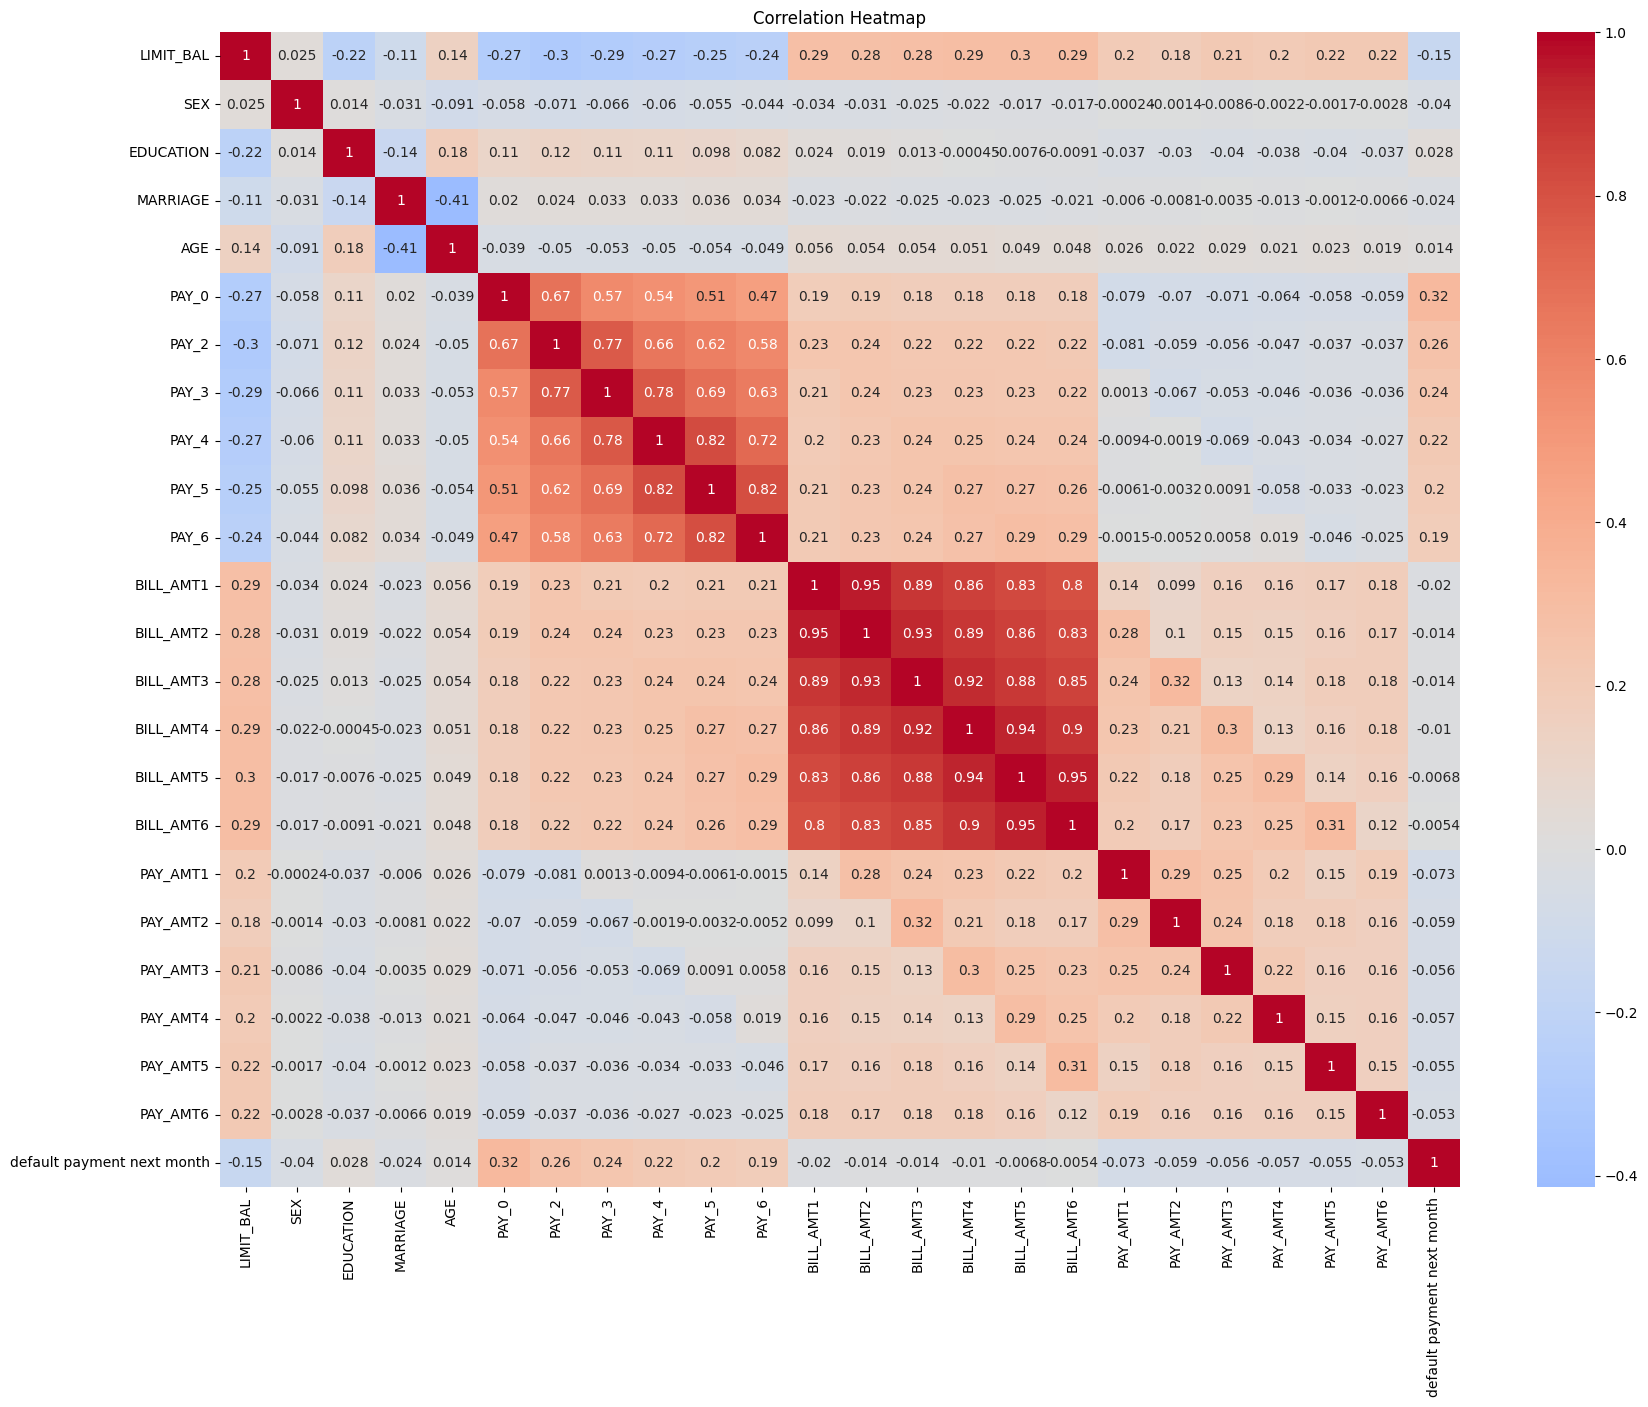

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# 상관계수 계산
correlation = data.drop(columns=['ID']).corr()

# 상관계수 히트맵 그리기
plt.figure(figsize=(20, 15))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

#Fineclassing & Coarseclassing

Fineclassing은 변수를 여러 개의 그룹으로 나누는 것을 의미하며, Coarseclassing은 이러한 세분화된 그룹을 합쳐서 큰 그룹을 만드는 것을 의미합니다. 이러한 과정은 주로 연속형 변수에 대해 적용됩니다.

##Fineclassing

In [31]:
# Fineclassing
bins = [20, 29, 39, 49, 59, 69, 79]
labels = ["20-29", "30-39", "40-49", "50-59", "60-69", "70-79"]
data['AGE_GROUP'] = pd.cut(data['AGE'], bins=bins, labels=labels, right=False)

# Coarseclassing (데이터 수가 적은 그룹은 합치기)
# 이 예에서는 모든 그룹을 그대로 둔 상태입니다. 실제로는 데이터 분포를 보고 결정해야 합니다.

# AGE_GROUP 분포 확인
age_group_counts = data['AGE_GROUP'].value_counts().sort_index()
age_group_counts

20-29     8013
30-39    11889
40-49     6966
50-59     2710
60-69      382
70-79       39
Name: AGE_GROUP, dtype: int64

In [6]:
# 교차 카운트 계산
cross_counts = pd.crosstab(data['AGE_GROUP'], data['default payment next month'])
cross_counts.columns = ['No Default', 'Default']

# Default의 비율 계산
cross_counts['Default Rate'] = cross_counts['Default'] / (cross_counts['Default'] + cross_counts['No Default'])

cross_counts

,No Default,Default,Default Rate
AGE_GROUP,,,
20-29,6129,1884,0.235118
30-39,9499,2390,0.201026
40-49,5401,1565,0.224663
50-59,2030,680,0.250923
60-69,275,107,0.280105
70-79,29,10,0.256410


##1차 Coarse Classing

In [7]:
# Coarseclassing
data['AGE_GROUP'] = data['AGE_GROUP'].replace(["60-69", "70-79"], "60+")

# AGE_GROUP 분포 확인
coarse_age_group_counts = data['AGE_GROUP'].value_counts().sort_index()
coarse_age_group_counts

20-29     8013
30-39    11889
40-49     6966
50-59     2710
60+        421
Name: AGE_GROUP, dtype: int64

In [8]:
# 교차 카운트 계산
cross_counts = pd.crosstab(data['AGE_GROUP'], data['default payment next month'])
cross_counts.columns = ['No Default', 'Default']

# Default의 비율 계산
cross_counts['Default Rate'] = cross_counts['Default'] / (cross_counts['Default'] + cross_counts['No Default'])

cross_counts

,No Default,Default,Default Rate
AGE_GROUP,,,
20-29,6129,1884,0.235118
30-39,9499,2390,0.201026
40-49,5401,1565,0.224663
50-59,2030,680,0.250923
60+,304,117,0.277910


##2차 Coarse Classing

In [9]:
# Assuming 'data' is a dataframe and 'AGE_GROUP' is one of its columns

# Replace "20-29" and "30-39" with "20-30s"
data['AGE_GROUP'] = data['AGE_GROUP'].replace(["20-29", "30-39"], "20-30s")

# Check the distribution of 'AGE_GROUP'
coarse_age_group_counts = data['AGE_GROUP'].value_counts().sort_index()
coarse_age_group_counts

20-30s    19902
40-49      6966
50-59      2710
60+         421
Name: AGE_GROUP, dtype: int64

In [10]:
# 교차 카운트 계산
cross_counts = pd.crosstab(data['AGE_GROUP'], data['default payment next month'])
cross_counts.columns = ['No Default', 'Default']

# Default의 비율 계산
cross_counts['Default Rate'] = cross_counts['Default'] / (cross_counts['Default'] + cross_counts['No Default'])

cross_counts

,No Default,Default,Default Rate
AGE_GROUP,,,
20-30s,15628,4274,0.214752
40-49,5401,1565,0.224663
50-59,2030,680,0.250923
60+,304,117,0.277910


##WOE와 IV값 산출
- **WOE**: 변수의 각 범주가 얼마나 좋은 예측력을 가지는지를 나타냅니다. WOE 값이 높을수록 해당 범주는 긍정 반응의 가능성이 높아집니다.
- **IV**: 전체 변수의 예측 능력을 평가합니다. IV 값이 높을수록 해당 변수는 반응 변수를 예측하는 데 중요합니다.

WOE와 IV는 변수 선택, 변환 및 신용 점수카드 모델링과 같은 금융 분야에서 주로 사용됩니다.

In [24]:
import numpy as np

# 각 그룹별 WOE계산
total_default = cross_counts['Default'].sum()
total_no_default = cross_counts['No Default'].sum()

cross_counts['% Defaults'] = cross_counts['Default'] / total_default
cross_counts['% No Defaults'] = cross_counts['No Default'] / total_no_default

cross_counts['WOE'] = np.log(cross_counts['% No Defaults'] / cross_counts['% Defaults'])

# Age에 따른 IV값 계산
cross_counts['IV'] = (cross_counts['% No Defaults'] - cross_counts['% Defaults']) * cross_counts['WOE']
iv_age_group = cross_counts['IV'].sum()
iv_age_group

0.0050076647768012685

In [25]:
cross_counts

,No Default,Default,Default Rate,% Defaults,% No Defaults,WOE,IV
AGE_GROUP,,,,,,,
20-30s,15628,4274,0.214752,0.644063,0.668921,0.037870,0.000941
40-49,5401,1565,0.224663,0.235835,0.231178,-0.019946,0.000093
50-59,2030,680,0.250923,0.102471,0.086890,-0.164946,0.002570
60+,304,117,0.277910,0.017631,0.013012,-0.303790,0.001403


#종속변수와 독립변수 구축

In [21]:
# AGE_GROUP 변수 One-hot 인코딩
data_encoded = pd.get_dummies(data, columns=['AGE_GROUP'], drop_first=True)

# ID 및 AGE 변수 제거
data_encoded = data_encoded.drop(columns=['ID', 'AGE'])

# 종속변수와 독립변수 분리
X = data_encoded.drop(columns=['default payment next month'])
y = data_encoded['default payment next month']

In [22]:
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,AGE_GROUP_40-49,AGE_GROUP_50-59,AGE_GROUP_60+
0,20000,2,2,1,2,2,-1,-1,-2,-2,...,0,0,689,0,0,0,0,0,0,0
1,120000,2,2,2,-1,2,0,0,0,2,...,3261,0,1000,1000,1000,0,2000,0,0,0
2,90000,2,2,2,0,0,0,0,0,0,...,15549,1518,1500,1000,1000,1000,5000,0,0,0
3,50000,2,2,1,0,0,0,0,0,0,...,29547,2000,2019,1200,1100,1069,1000,0,0,0
4,50000,1,2,1,-1,0,-1,0,0,0,...,19131,2000,36681,10000,9000,689,679,0,1,0


In [23]:
y.head()

0    1
1    1
2    0
3    0
4    0
Name: default payment next month, dtype: int64

#머신러닝 모델 적합

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 로지스틱 회귀 모델 적합
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# 예측
y_pred_train = log_reg.predict(X_train)
y_pred_test = log_reg.predict(X_test)

# 성능 평가
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
classification_rep = classification_report(y_test, y_pred_test)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
train_accuracy, test_accuracy

(0.778125, 0.7811666666666667)

In [16]:
print(classification_rep)

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      4687
           1       0.00      0.00      0.00      1313

    accuracy                           0.78      6000
   macro avg       0.39      0.50      0.44      6000
weighted avg       0.61      0.78      0.69      6000



#점수화 - Credit Score 산출
신용 점수는 로지스틱 회귀의 결과로 얻은 확률값을 기반으로 산출될 수 있습니다. 일반적으로 로지스틱 회귀 모델은 어떤 사건이 발생할 확률을 예측하는 데 사용됩니다. 여기서는 결제 연체 확률을 예측하는 것입니다.

In [26]:
# 확률 p 예측
probabilities = log_reg.predict_proba(X_test)[:, 1]

# 신용 점수 산출
A = 600
B = 50

# 신용 점수 산출
credit_scores = A - B * np.log(probabilities / (1 - probabilities))

credit_scores[:10]  # 처음 10개의 신용 점수 보기

array([611.40608066, 656.24427174, 618.01198927, 646.1849148 ,
       645.45873954, 628.36853816, 634.13784686, 637.93003044,
       704.81842905, 657.8438022 ])

#등급 산출
신용 점수를 기반으로 고객을 등급별로 나눌 수 있습니다. 1등급에서 10등급으로 나누기 위해 신용 점수의 분포를 기반으로 등급을 산출하겠습니다. 여기서는 신용 점수의 분포를 기반으로 등급의 경계값을 설정하겠습니다.

In [27]:
# 신용 점수의 분포를 기반으로 등급 경계값 설정
grade_thresholds = np.percentile(credit_scores, np.linspace(10, 100, 10))

# 등급 산출 함수
def get_grade(score, thresholds):
    for idx, threshold in enumerate(thresholds):
        if score <= threshold:
            return idx + 1
    return 10

# 각 고객의 등급 산출
# 상한과 하한 설정
upper_limit = 1000
lower_limit = 300  # 예시로 300점을 하한으로 설정

credit_scores = np.clip(credit_scores, lower_limit, upper_limit)

# 다시 각 고객의 등급 산출
grades = np.array([get_grade(score, grade_thresholds) for score in credit_scores])

grades[:10]  # 상한과 하한을 적용한 후의 처음 10개의 고객 등급 보기

array([1, 6, 2, 5, 5, 4, 4, 5, 9, 6])

In [28]:
# 신용 점수 및 등급 분포 확인
grade_distribution = pd.DataFrame({
    'Credit Score': credit_scores,
    'Grade': grades
})

grade_summary = grade_distribution.groupby('Grade').agg(
    {'Credit Score': ['mean', 'min', 'max'], 'Grade': 'count'}
).reset_index()

grade_summary.columns = ['Grade', 'Average Credit Score', 'Min Credit Score', 'Max Credit Score', 'Count']
grade_summary

,Grade,Average Credit Score,Min Credit Score,Max Credit Score,Count
0,1,607.778166,601.647828,611.435776,600
1,2,615.473951,611.437567,619.101992,600
2,3,623.206908,619.102239,627.447526,600
3,4,631.931073,627.449412,636.762484,600
4,5,643.017355,636.788634,649.221205,600
5,6,655.587845,649.223505,661.887904,600
6,7,669.155225,661.901322,677.292022,600
7,8,686.854175,677.305828,697.934579,600
8,9,713.207818,698.035087,734.118586,600
9,10,793.970955,734.118622,1000.000000,600


#스코어 카드 산출

In [29]:
# AGE_GROUP 변수의 각 그룹에 대한 연체 확률 계산
default_prob_by_age_group = data.groupby('AGE_GROUP').apply(lambda x: x['default payment next month'].mean())

# Base Odds 및 Group Odds 계산
base_odds = data['default payment next month'].mean() / (1 - data['default payment next month'].mean())
group_odds = default_prob_by_age_group / (1 - default_prob_by_age_group)

# 점수 계산
B = 20
scores_by_age_group = B * (base_odds - group_odds)

scores_by_age_group

AGE_GROUP
20-30s    0.210864
40-49    -0.114689
50-59    -1.018973
60+      -2.016834
dtype: float64

In [30]:
# AGE_GROUP 변수에 대한 스코어카드 작성
scorecard_age_group = pd.DataFrame({
    'Variable': 'AGE_GROUP',
    'Group': scores_by_age_group.index,
    'Score': scores_by_age_group.values
})

scorecard_age_group

,Variable,Group,Score
0,AGE_GROUP,20-30s,0.210864
1,AGE_GROUP,40-49,-0.114689
2,AGE_GROUP,50-59,-1.018973
3,AGE_GROUP,60+,-2.016834
